In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
print(pd.__version__)


# Cargar los datos
df = pd.read_csv('Z:/7mo/Python/Assignments/Lab1/PRSA_Data_Guanyuan_20130301-20170228.csv')

# Elimina filas donde y (PM2.5) tiene valores NaN
df = df.dropna(subset=['PM2.5'])

# Considerando al 'PM2.5' es la variable objetivo y las demás son tus características
X = df[['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].values
y = df['PM2.5'].values
m = y.size


# Imputa valores NaN solo en columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

2.2.1


In [27]:
def featureNormalize(X):
    # Calcular la media y la desviación estándar
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    
    # Normalizar las características
    X_norm = (X - mu) / sigma
    
    # Verificar si se ha introducido algún NaN durante la normalización
    if np.any(np.isnan(X_norm)):
        print("NaN encontrado en la normalización")
        print(X_norm)
        # Imprimir para depuración

    return X_norm, mu, sigma

features_columns = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
X = df[features_columns].values

X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[  4.   14.   20.  ... -18.8   0.    4.4]
 [  4.   13.   17.  ... -18.2   0.    4.7]
 [  3.   10.   19.  ... -18.2   0.    5.6]
 ...
 [ 33.    5.   39.  ... -13.3   0.    1.1]
 [ 24.    5.   47.  ... -12.9   0.    1.2]
 [ 27.    5.   53.  ... -15.9   0.    1.3]]
Media calculada: [1.08897649e+02 1.75750839e+01 5.78432968e+01 1.25370085e+03
 5.53502027e+01 1.35039443e+01 1.01192594e+03 3.05964642e+00
 6.71562935e-02 1.70833720e+00]
Desviación estandar calculada: [9.08544385e+01 2.35611045e+01 3.48843214e+01 1.13400193e+03
 5.67040976e+01 1.13875697e+01 1.03715534e+01 1.36810584e+01
 9.11393802e-01 1.20300084e+00]
[[-1.15456823 -0.15173668 -1.0848225  ... -1.59780375 -0.07368526
   2.23745711]
 [-1.15456823 -0.19417952 -1.17082102 ... -1.55394749 -0.07368526
   2.4868335 ]
 [-1.16557485 -0.32150801 -1.11348867 ... -1.55394749 -0.07368526
   3.23496265]
 ...
 [-0.83537634 -0.53372217 -0.54016521 ... -1.19578807 -0.07368526
  -0.50568311]
 [-0.9344359  -0.53372217 -0.31083582 ... -1.166550

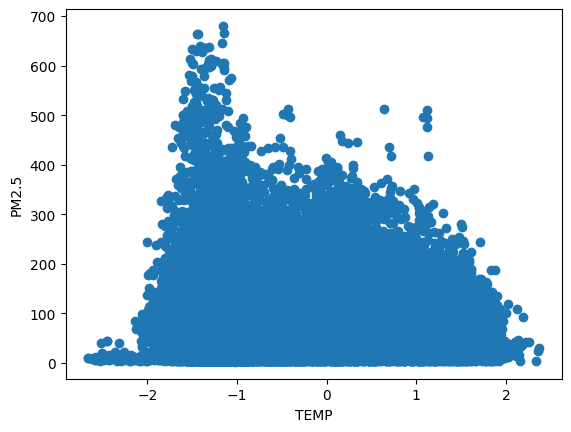

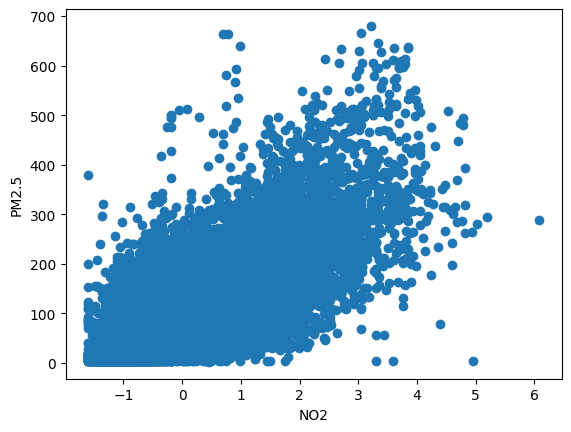

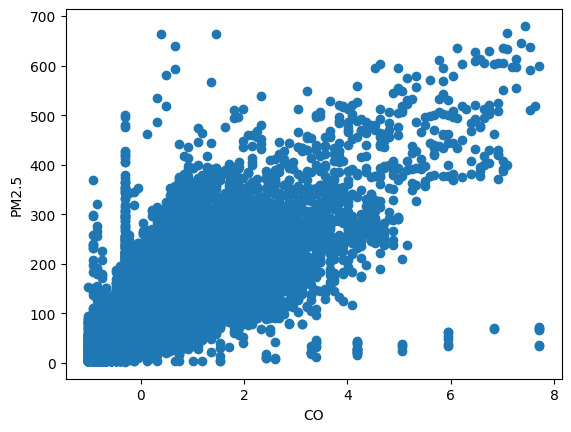

In [28]:
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.scatter(x, y)
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.show()


# Visualización de PM2.5 contra TEMP
graficarDatos(X_norm[:, 5], y, 'TEMP', 'PM2.5')  # TEMP

# Visualización de PM2.5 contra NO2
graficarDatos(X_norm[:, 2], y, 'NO2', 'PM2.5')  # NO2

# Visualización de PM2.5 contra CO
graficarDatos(X_norm[:, 3], y, 'CO', 'PM2.5')  # CO

In [53]:
# Agregar el término de intercepción

X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [54]:
# Definir la función de Costo

def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [55]:
#Ajustar el tamaño de 'theta' para Coincidir con X_ready

# Inicializa theta con ceros para todas las características incluyendo el término de intercepción
theta = np.zeros(X_ready.shape[1])

# Calcular el Costo Inicial
JJ = calcularCosto(X_ready, y, theta)
print(f"Con theta inicializado a ceros, se obtiene un costo de: {JJ}")

Con theta inicializado a ceros, se obtiene un costo de: 6713.992518288434


In [56]:
# Implementar el descenso por el Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_historico.append(calcularCosto(X, y, theta))

    return theta, J_historico

In [96]:
# Selecionamos el coeficiente de aprendizaje y número de iteraciones
alpha = 0.001  # Puedes necesitar ajustar esto
num_ite = 35000  # Puedes aumentar o disminuir según la necesidad

# Ahora `theta` ya tiene la longitud correcta
theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

los valores de theta calculados son: [ 82.93337204  51.77761399   2.1632765    5.82840806  19.94548004
   6.6997712  -11.85158518   6.13667148  19.2170939    0.18329649
  -0.31388431]
con un costo de: 439.7379136672878 


Text(0, 0.5, 'Costo J')

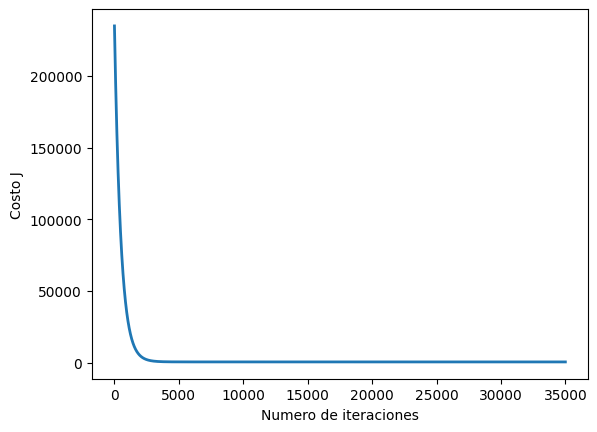

In [97]:
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

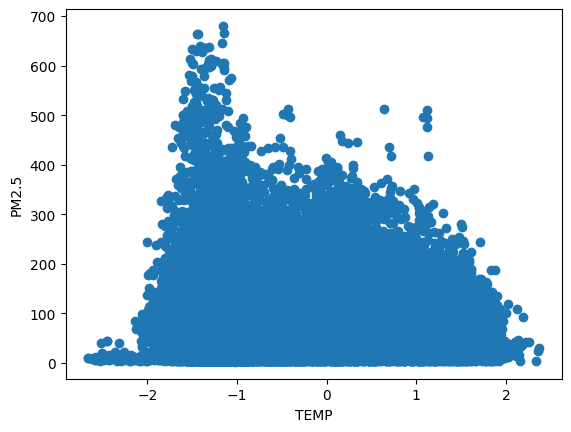

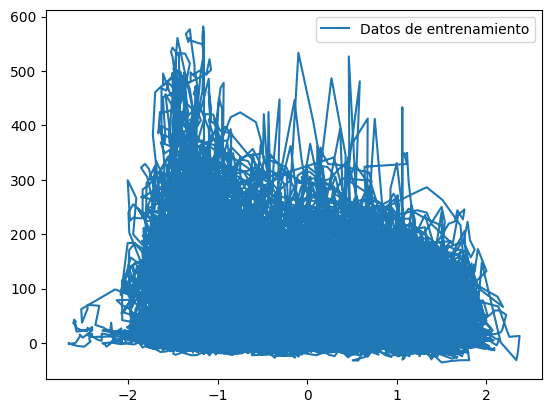

In [105]:
xlabel = 'TEMP'
ylabel = 'PM2.5'
index_TEMP = 6  
graficarDatos(X_ready[:, index_TEMP], y, xlabel, ylabel)

# Dibuja la línea de regresión
pyplot.plot(X_ready[:, index_TEMP], np.dot(X_ready, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal'])

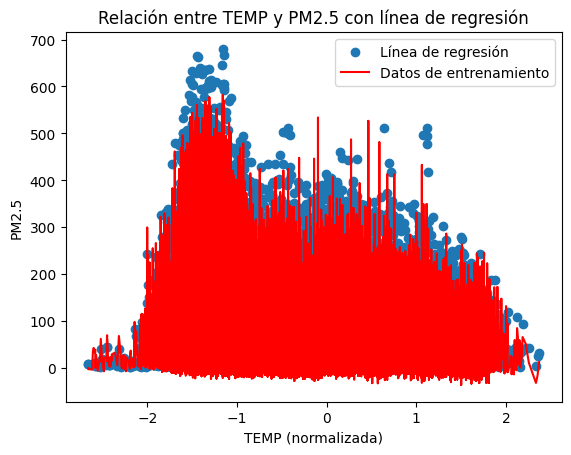

In [106]:
# Ordena los valores de TEMP para la visualización de la línea de regresión
sort_idx = np.argsort(X_ready[:, index_TEMP])
X_sorted = X_ready[sort_idx]

# Calcula la línea de regresión
y_pred_sorted = np.dot(X_sorted, theta)

# Gráfica la línea de regresión sobre los datos de dispersión
pyplot.scatter(X_ready[:, index_TEMP], y)  # Datos de dispersión
pyplot.plot(X_sorted[:, index_TEMP], y_pred_sorted, color='red')  # Línea de regresión
pyplot.xlabel('TEMP (normalizada)')
pyplot.ylabel('PM2.5')
pyplot.title('Relación entre TEMP y PM2.5 con línea de regresión')
pyplot.legend(['Línea de regresión', 'Datos de entrenamiento'])
pyplot.show()


In [100]:
#Utilizando la ecuacion de la normal

def calcularThetaEcuacionNormal(X, y):
    # Agregar una columna de unos para el término de intercepción si aún no está presente
    if X.shape[1] == len(features_columns):  # features_columns es la lista de características
        X = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    # Calcular theta utilizando la ecuación normal
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return theta


In [108]:
theta_normal = calcularThetaEcuacionNormal(X_norm, y)
print(f"Los valores de theta calculados con la Ecuación Normal son: {theta_normal}")


Los valores de theta calculados con la Ecuación Normal son: [ 82.93337204  51.73247215   2.18133983   5.9215034   19.80872779
   6.86162585 -12.54963876   6.04679135  19.77193282   0.15121217
  -0.15238176]
